# `tesseract.js` Examples

Examples of using [`jupyter_anywidget_tesseract_pdfjs`](https://github.com/innovationOUtside/jupyter_anywidget_tesseract_pdfjs).

Create a widget as:

- `t = tesseract_panel()`
- `t = tesseract_panel("example panel title)`
- `t = tesseract_panel(None, "split-bottom")`

In [1]:
# pip install jupyter_anywidget_tesseract_pdfjs
## Repo: https://github.com/innovationOUtside/jupyter_anywidget_tesseract_pdfjs

# Import package
from jupyter_anywidget_tesseract_pdfjs import tesseract_panel

# Create a widget panel with a handle
t = tesseract_panel()

Upload an image or PDF file by:

- dragging and dropping it onto landing target area;
- click on landing target area and select file from dialogue;

Image handling via the widget API:

- set a new URL path to an image on the widget: `t.url='https://tesseract.projectnaptha.com/img/eng_bw.png'`
- set a new data URI on the widget object: `t.datauri = DATAURI`;
    - the helper function `from jupyter_anywidget_tesseract_pdfjs.utils import image_to_data_uri
` can generate a data URI from:
      - an image file at a URL;
      - an image file on a local path;
      - a `matplotlib` axes object (with type `matplotlib.axes._axes.Axes`)
      - an IPython `Image` display object (`IPython.core.display.Image` type; for example returned from a previous cell: `image_to_data_uri(_)`)
- pass a thing that can be converted to a data URL (a URL or local path to an image, a `matplotlib` axes or IPython `Image` display object) to `t.set_datauri(THING)`

## Accessing extracted text

When the text has been extracted it will be available as:

`t.pagedata`

The text extracted from the last image to be processed is also available as `t.extracted`.

## Summary table of fule usage with `jupyter_anywidget_tesseract_pdfjs`

| Filetype  | Local file  | Web URL |
|---|---|---|
| Image  | File drag / select; `widget.set_datauri(?)` | `widget.url=?`, `widget.set_url(?)`, `widget.set_datauri(?)` |
|  PDF  |  File drag / select  | `widget.pdf=?`, `widget.set_url(?)`  |
| Image Data URI | `widget.datauri=?` | N/A |
| `matplotlib` axes object | `widget.set_datauri(ax)` | N/A |
| IPython `Image` displayed object | `widget.set_datauri(_)` in next run cell | N/A |

*The landing target is still misbehaving a little... Reload the JupyerLab window if it stops playing nicely.*

In [2]:
# Image at URL
image_url = "https://tesseract.projectnaptha.com/img/eng_bw.png"

t.url = image_url

We can access extracted text via: `t.pagedata`

The results object takes the form:

```python
{'typ': 'pdf',
 'pages': 3,
 'name': 'sample-3pp.pdf',
 'p3': 'elementum. Morbi in  ...',
 'processed': 2,
 'p1': "Created for testing ...'
}
```

The keys of the form `pN` are page numbers; the `processed` item keeps a count of pages that have been processed; the `pages` item is the total number of pages submutted for processing.


In [3]:
t.pagedata

{'typ': 'url',
 'location': 'https://tesseract.projectnaptha.com/img/eng_bw.png',
 'p1': 'Mild Splendour of the various-vested Night!\nMother of wildly-working visions! hail\nI watch thy gliding, while with watery light\nThy weak eye glimmers through a fleecy veil;\nAnd when thou lovest thy pale orb to shroud\nBehind the gather’d blackness lost on high;\nAnd when thou dartest from the wind-rent cloud\nThy placid lightning o’er the awaken’d sky.\n',
 'processed': 1}

Alternatively, we can pass the URL to `.set_url()`.

*An optional `force=True` (default: `False`) forces an empty `''` value before setting the URL to ensure the change event that initiates the OCR process is triggered on the `url` value.*

In [4]:
# Set the URL and force the OCR process
t.set_url(image_url, True)

Extract text from a local image by casting it to a data URI:

In [5]:
# Save a URL as a local file
import urllib.request
local_image = 'local_file.png'
urllib.request.urlretrieve(image_url, local_image)

t.set_datauri('') # Force a change in the URI
t.set_datauri(local_image)

In [6]:
t.pagedata

{'typ': 'datauri',
 'location': 'local_file.png',
 'p1': 'Mild Splendour of the various-vested Night!\nMother of wildly-working visions! hail\nI watch thy gliding, while with watery light\nThy weak eye glimmers through a fleecy veil;\nAnd when thou lovest thy pale orb to shroud\nBehind the gather’d blackness lost on high;\nAnd when thou dartest from the wind-rent cloud\nThy placid lightning o’er the awaken’d sky.\n',
 'processed': 1}

In [7]:
# We can also force the update
t.set_datauri(local_image, force=True)
#t.set_datauri(local_image, True)

In [8]:
t.pagedata

{'typ': 'datauri',
 'location': 'local_file.png',
 'p1': 'Mild Splendour of the various-vested Night!\nMother of wildly-working visions! hail\nI watch thy gliding, while with watery light\nThy weak eye glimmers through a fleecy veil;\nAnd when thou lovest thy pale orb to shroud\nBehind the gather’d blackness lost on high;\nAnd when thou dartest from the wind-rent cloud\nThy placid lightning o’er the awaken’d sky.\n',
 'processed': 1}

Extract text from `matplotlib` axes object:

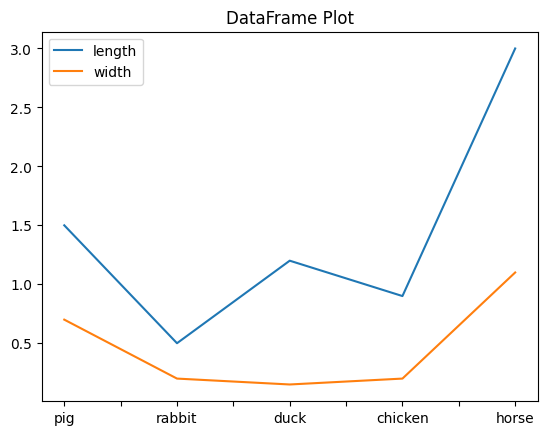

In [10]:
import pandas as pd
df = pd.DataFrame({'length': [1.5, 0.5, 1.2, 0.9, 3],
                  'width': [0.7, 0.2, 0.15, 0.2, 1.1]},
                  index=['pig', 'rabbit', 'duck', 'chicken', 'horse'])
ax = df.plot(title="DataFrame Plot")

In [11]:
t.set_datauri(ax)

In [12]:
t.pagedata

{'typ': 'datauri',
 'location': 'matplotlib.axes._axes.Axes',
 'p1': 'DataFrame Plot\n\n301 — length\n\n— width\n25\n2.0\n15\n10\n05\n\npig rabbit duck chicken horse\n',
 'processed': 1}

Extract text from an IPython `Image` object:

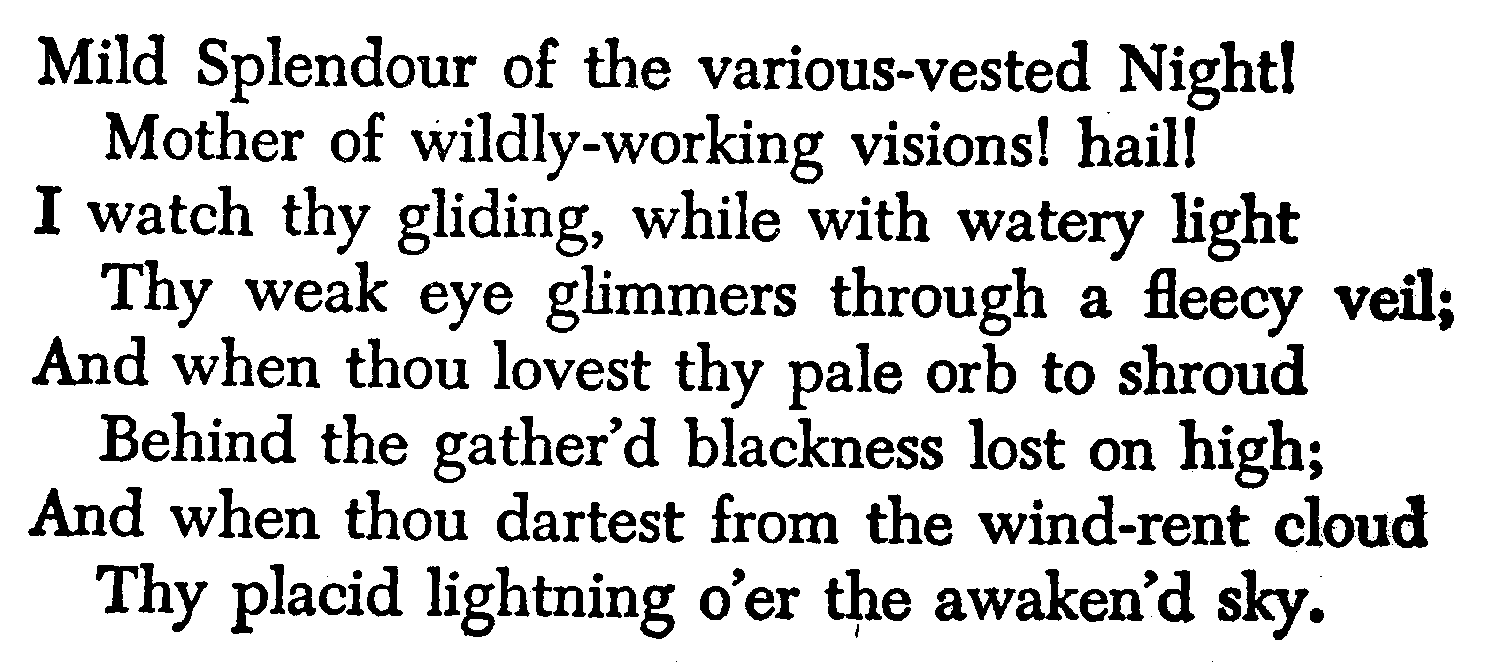

In [13]:
from IPython.display import Image
Image(local_image)

In [14]:
t.set_datauri(_)

In [15]:
t.pagedata

{'typ': 'datauri',
 'location': 'IPython.core.display.Image',
 'p1': 'Mild Splendour of the various-vested Night!\nMother of wildly-working visions! hail\nI watch thy gliding, while with watery light\nThy weak eye glimmers through a fleecy veil;\nAnd when thou lovest thy pale orb to shroud\nBehind the gather’d blackness lost on high;\nAnd when thou dartest from the wind-rent cloud\nThy placid lightning o’er the awaken’d sky.\n',
 'processed': 1}

Extract text from an online PDF:

In [9]:
pdf_url = "https://pdfobject.com/pdf/sample-3pp.pdf"
t.set_url(pdf_url)
## Alternatively:
# t.pdf = pdf_url

In [13]:
t.pagedata

{'typ': 'pdf',
 'pages': 3,
 'name': 'sample-3pp.pdf',
 'p3': 'elementum. Morbi in ipsum sit amet pede facilisis laoreet. Donec lacus nunc, viverra nec, blandit\nvel, egestas et, augue. Vestibulum tincidunt malesuada tellus. Ut ultrices ultrices enim. Curabitur\nsit amet mauris.\nMorbi in dui quis est pulvinar ullamcorper. Nulla facilisi. Integer lacinia sollicitudin massa. Cras\nmetus. Sed aliquet risus a tortor. Integer id quam. Morbi mi. Quisque nisl felis, venenatis tristique,\ndignissim in, ultrices sit amet, augue. Proin sodales libero eget ante. Nulla quam. Aenean laoreet.\nVestibulum nisi lectus, commodo ac, facilisis ac, ultricies eu, pede. Ut orci risus, accumsan\nporttitor, cursus quis, aliquet eget, justo. Sed pretium blandit orci.\nUt eu diam at pede suscipit sodales. Aenean lectus elit, fermentum non, convallis id, sagittis at,\nneque. Nullam mauris orci, aliquet et, iaculis et, viverra vitae, ligula. Nulla ut felis in purus\naliquam imperdiet. Maecenas aliquet mollis lec

## View History

We can view a history of actions:

In [15]:
t.history

['datauri::https://tesseract.projectnaptha.com/img/eng_bw.png',
 'datauri::',
 'datauri::local_file.png',
 'datauri::local_file.png',
 'datauri::local_file.png',
 'datauri::https://tesseract.projectnaptha.com/img/eng_bw.png',
 'datauri::https://tesseract.projectnaptha.com/img/eng_bw.png']